In [4]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
import seaborn as sns
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf
import yfinance as yf
%matplotlib inline
from pandas_datareader import data as pdr

In [7]:
import datetime as dt
stock_name = "POWERGRID.NS"
start = dt.datetime(2015,1,1)
end = dt.datetime(2025,1,1)

df = yf.download(stock_name, start, end)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2015-01-01,50.078022,50.479816,50.004972,50.406761,778837
2015-01-02,50.680710,50.899871,50.096288,50.096288,3612848
2015-01-05,50.735519,51.173836,49.731037,50.589409,7291352
2015-01-06,49.603199,50.516365,49.000510,50.425049,8288963
2015-01-07,50.315453,50.589402,48.763070,49.310970,3256180


In [9]:
df.columns


MultiIndex([( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,2467.000000,2467.000000,2467.000000,2467.000000,2.467000e+03
mean,113.751327,115.150680,112.369498,113.789505,1.340335e+07
std,72.270101,73.141552,71.307997,72.241153,1.310777e+07
min,45.348621,46.260854,44.703371,45.241073,2.233080e+05
25%,71.751453,72.741133,70.788262,71.705323,6.629293e+06
50%,80.465439,81.245883,79.668634,80.465453,1.043165e+07
75%,141.352081,143.328543,139.749197,141.819157,1.629144e+07
max,354.580750,355.356950,346.576122,353.222365,2.743525e+08


In [11]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [13]:
df.value_counts()

(Close, POWERGRID.NS)  (High, POWERGRID.NS)  (Low, POWERGRID.NS)  (Open, POWERGRID.NS)  (Volume, POWERGRID.NS)
354.580750             355.211411            346.576122           353.222365            18733959                  1
45.348621              46.559383             44.926689            46.559383             3868544                   1
45.352325              46.316475             44.703371            45.537740             3112256                   1
328.189697             331.343035            325.861084           326.443245            7993675                   1
                                             327.025376           327.219439            7748570                   1
                                                                                                                 ..
46.669453              46.981317             45.898966            46.009033             3114461                   1
46.724403              48.393132             46.205244            47.985224  

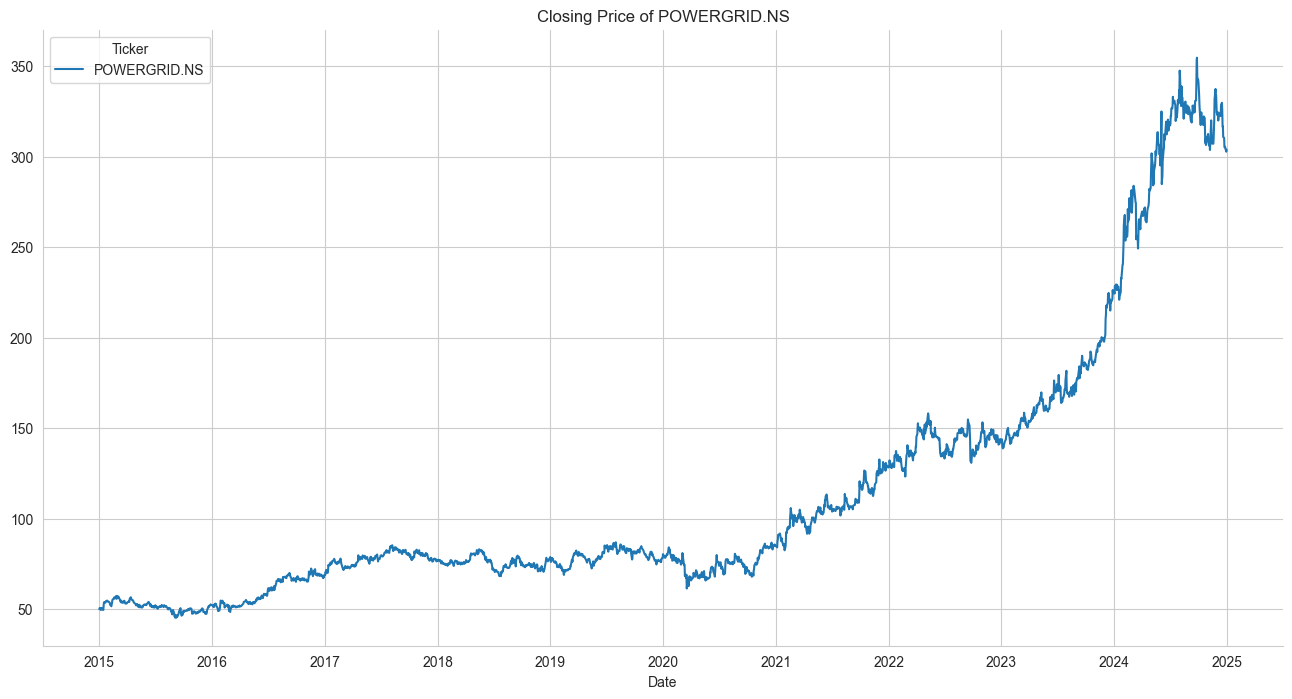

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.lineplot(data=df['Close'])
plt.title(f'Closing Price of {stock_name}')
sns.despine()
plt.show()